In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from data_helper import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [9]:
log_name = "linear_regression"

In [10]:
from sklearn.linear_model import LinearRegression

In [4]:
check_on_dataset(scaled_model, "scaled_lin_reg", log_name, final_model = LinearRegression)

In [5]:
pca_values = {'dist': 1, 'dist_time': 2, 'dist_remoteness': 6, 'full': 8, 'simd': 11}
for subset in pca_values.keys():
    for i in range(50):
        fit_and_evaluate_ML_model(PCA_model, "pca_linreg", dataset_in, subset, log_name, final_model = LinearRegression, n_components = pca_values[subset])

We broadly see that normalization doesn't matter 

In [11]:
from sklearn.linear_model import Ridge

In [7]:
alpha_vals = [10**i for i in range(-5, 5)]

In [8]:
subset_scores = {}
for subset in subsets:
    subset_scores[subset] = []
    for alpha in alpha_vals:
        model = Ridge(alpha = alpha)
        model.fit(dataset_in["train"][subset], dataset_in["train"]["y"])
        subset_scores[subset].append((alpha, model.score(dataset_in["val"][subset], dataset_in["val"]["y"])))

In [9]:
subset_scores

{'simd': [(1e-05, 0.23577178660411158),
  (0.0001, 0.23577171754691084),
  (0.001, 0.23577102437252728),
  (0.01, 0.2357638340632039),
  (0.1, 0.2356676668776454),
  (1, 0.23332769115127694),
  (10, 0.21259627002054382),
  (100, 0.1864517954787207),
  (1000, 0.16515519742382556),
  (10000, 0.14974461452989618)],
 'dist': [(1e-05, 0.8874569338978111),
  (0.0001, 0.8874569338978084),
  (0.001, 0.8874569338977821),
  (0.01, 0.8874569338975187),
  (0.1, 0.8874569338948847),
  (1, 0.8874569338685442),
  (10, 0.8874569336051088),
  (100, 0.8874569309677409),
  (1000, 0.8874569042927385),
  (10000, 0.8874566074220074)],
 'dist_remoteness': [(1e-05, 0.9258939659897746),
  (0.0001, 0.9258939659897447),
  (0.001, 0.9258939659894464),
  (0.01, 0.9258939659864629),
  (0.1, 0.925893965956627),
  (1, 0.9258939656581666),
  (10, 0.9258939626633822),
  (100, 0.925893931698079),
  (1000, 0.9258935208633279),
  (10000, 0.9258798357750527)],
 'dist_time': [(1e-05, 0.9173305325776816),
  (0.0001, 0.917330

We checked regularisation weights - don't seem to matter much apart from simd where larger values perform worse

In [10]:
check_on_dataset(scaled_model, "scaled_ridge_reg", log_name, final_model = Ridge)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
X_train = dataset_in["train"]["dist_time"]
y_train = dataset_in["train"]["y"]

X_val = dataset_in["val"]["dist_time"]
y_val = dataset_in["val"]["y"]

In [14]:
linreg_train_scores = []
linreg_val_scores = []

ridge_train_scores = []
ridge_val_scores = []
K = 10


for k in range(1, K):
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg", LinearRegression())])
    model.fit(X_train, y_train)
    linreg_train_scores.append(model.score(X_train, y_train))
    linreg_val_scores.append(model.score(X_val, y_val))
    print(model.named_steps["poly"].n_output_features_)


for k in range(1, K):
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg_reg", Ridge(alpha = 1))])
    model.fit(X_train, y_train)
    ridge_train_scores.append(model.score(X_train, y_train))
    ridge_val_scores.append(model.score(X_val, y_val))



4
10
20
35
56
84
120
165
220


C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.533314e-18
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.276738e-23
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.700673e-28
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\_ridge.py:157: Lin

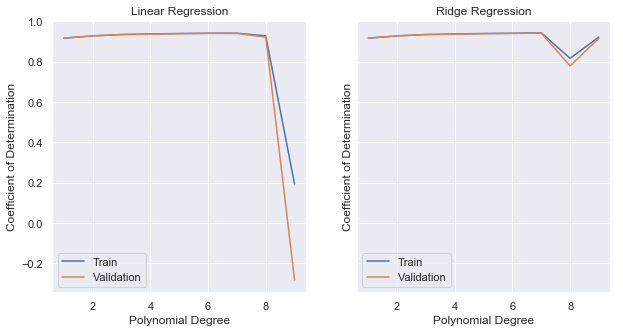

In [15]:
fig, ax = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(10, 5)

ax[0].plot(range(1, K), linreg_train_scores, label = "Train")
ax[0].plot(range(1, K), linreg_val_scores, label = "Validation")
ax[0].legend()
ax[0].title.set_text("Linear Regression")
ax[0].set_xlabel("Polynomial Degree")
ax[0].set_ylabel("Coefficient of Determination")

ax[1].plot(range(1, K), ridge_train_scores, label = "Train")
ax[1].plot(range(1, K), ridge_val_scores, label = "Validation")
ax[1].legend()
ax[1].title.set_text("Ridge Regression")
ax[1].set_xlabel("Polynomial Degree")
ax[1].set_ylabel("Coefficient of Determination")

plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\ML\poly_linreg.png", dpi = 300)

Best model: scaled linreg on full subset

In [15]:
best_model = scaled_model(final_model = LinearRegression)
best_model.fit(dataset_in["train"]["full"], dataset_in["train"]["y"])

Pipeline(steps=[('scale', StandardScaler()), ('ml_model', LinearRegression())])

<BarContainer object of 49 artists>

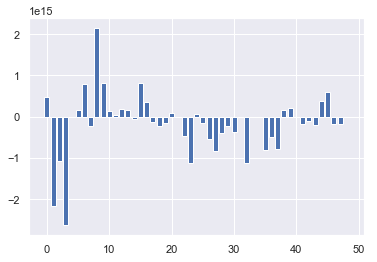

In [16]:
best_model_weights = best_model.named_steps["ml_model"].coef_
plt.bar(range(len(best_model_weights)), best_model_weights)